In [5]:
# pip install trdg --no-deps

In [7]:
# pip install beautifulsoup4 diffimg tensorflow 

In [8]:
# pip install arabic-reshaper python-bidi wikipedia

In [11]:
pip install "pillow<10.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
trdg 1.8.0 requires arabic-reshaper==2.1.3, but you have arabic-reshaper 3.0.0 which is incompatible.
trdg 1.8.0 requires diffimg==0.2.3, but you have diffimg 0.3.0 which is incompatible.
trdg 1.8.0 requires python-bidi==0.4.2, but you have python-bidi 0.6.6 which is incompatible.
mistral-common 1.5.6 requires pillow>=10.3.0, but you have pillow 9.5.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [67]:
# import os
# import zipfile

# def unzip_all_in_folder(source_folder, destination_folder):
#     # Ensure the destination folder exists
#     os.makedirs(destination_folder, exist_ok=True)

#     # Iterate over all files in the source folder
#     for filename in os.listdir(source_folder):
#         if filename.lower().endswith('.zip'):
#             zip_path = os.path.join(source_folder, filename)
#             print(f"Extracting: {zip_path}")
#             try:
#                 with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                     zip_ref.extractall(destination_folder)
#             except zipfile.BadZipFile:
#                 print(f"Warning: '{filename}' is not a valid zip file.")

# # Example usage
# source_folder = './fonts/freefonts/'       # Replace with your zip folder
# destination_folder = './fonts/freefonts/'  # Replace with your target folder

# unzip_all_in_folder(source_folder, destination_folder)

In [76]:
len(glob.glob('./fonts/*/*.*'))

224

In [82]:
from trdg.generators import GeneratorFromWikipedia
GeneratorFromWikipedia?

Init signature:
GeneratorFromWikipedia(
    count=-1,
    minimum_length=1,
    fonts=[],
    language='en',
    size=32,
    skewing_angle=0,
    random_skew=False,
    blur=0,
    random_blur=False,
    background_type=0,
    distorsion_type=0,
    distorsion_orientation=0,
    is_handwritten=False,
    width=-1,
    alignment=1,
    text_color='#282828',
    orientation=0,
    space_width=1.0,
    character_spacing=0,
    margins=(5, 5, 5, 5),
    fit=False,
    output_mask=False,
    word_split=False,
    image_dir='/opt/conda/lib/python3.11/site-packages/trdg/generators/images',
    stroke_width=0,
    stroke_fill='#282828',
    image_mode='RGB',
    output_bboxes=0,
)
Docstring:      Generator that uses sentences taken from random Wikipedia articles
File:           /opt/conda/lib/python3.11/site-packages/trdg/generators/from_wikipedia.py
Type:           type
Subclasses:     

In [87]:
from datasets import load_dataset

ds = load_dataset("HebArabNlpProject/HebNLI")

ds

Generating test split: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 884/884 [00:00<00:00, 26206.62 examples/s]


In [124]:
row_idx = 0

ERROR! Session/line number was not unique in database. History logging moved to new session 22


In [126]:
from trdg.generators import GeneratorFromStrings
import glob
import numpy as np
from matplotlib import pyplot as plt
import random 
import tqdm
from concurrent.futures import ThreadPoolExecutor
import os

def save_image_and_label(img, label, filename_base):
    img.save(f"{filename_base}.jpg")
    with open(f"{filename_base}.txt", "w", encoding="utf-8") as f:
        f.write(label)

        
executor = ThreadPoolExecutor(max_workers=16)


font_list = glob.glob('./fonts/*/*.*')


print('loading fonts and text')
generator = GeneratorFromStrings(
    # ['בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש'],
    # [row['translation1'], row['translation2']], 
    list(ds['train']['translation1'])[0:10000],
    size=128,
    skewing_angle=3,
    random_skew=True,
    blur=1,
    random_blur=True,
    fonts = font_list,
    rtl=True, 
    language="he",
    margins=(25, 25, 25, 25),
)

print('generating')

counter = 0
for img, lbl in tqdm.tqdm(generator):
    if img:
        # executor.submit(img.save(f"./dataset_0/{row_idx:0{12}d}_part_1.jpg"))

        filename_base = f"./dataset_0/{row_idx:0{12}d}_part_2"
        executor.submit(save_image_and_label, img, lbl, filename_base)
        
        

    row_idx += 1
    counter += 1
    if counter == 10000:
        break

    

executor.shutdown()  # Ensure all saves finish


loading fonts and text
generating


9999it [28:28,  5.85it/s]


In [121]:
lbl

'אז בכל מקרה, אולי הוא ישים את ווילי הורטון הזה על הכרטיס אחרי הכול.'

In [116]:
executor.shutdown()  # Ensure all saves finish

In [113]:
len()

300150

In [108]:
ds['train'][2]

{'original_annotator_labels': "['entailment']",
 'genre': 'government',
 'original_label': 'entailment',
 'pairID': '63601e',
 'promptID': 63601,
 'sentence1': 'As agreed with the participants, the purpose of the discussion was not to reach a consensus, but rather to engage in an open, no attribution-based dialogue.',
 'translation1': 'כפי שסוכם עם המשתתפים, מטרת הדיון לא הייתה להגיע לקונצנזוס, אלא לעסוק בדיאלוג פתוח ללא ייחוס.',
 'sentence2': 'An agreement was made with participants to ensure that the discussion would involve open dialogue.',
 'translation2': 'הוסכם עם המשתתפים לוודא שהדיון יכלול שיח פתוח.',
 'hebrew_label': None}

In [104]:
len(ds['train'])

300150

['./fonts/alefalefalef/DanaYadAlefAlefAlef-Normal.otf']


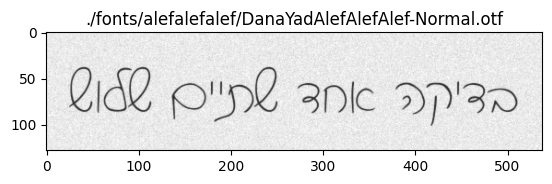

['./fonts/alefalefalef/gadi-almog-regular-aaa.otf']


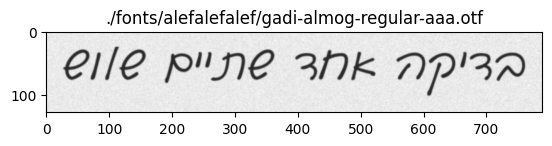

['./fonts/alefalefalef/GveretLevinAlefAlefAlef-Regular.otf']


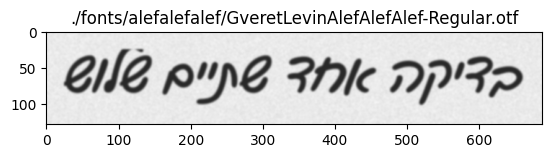

In [84]:
from trdg.generators import GeneratorFromStrings
import glob
import numpy as np
from matplotlib import pyplot as plt

font_list = glob.glob('./fonts/*/*.*')[0:3]
for i in range(len(font_list)):
    print([font_list[i]])
    generator = GeneratorFromStrings(
        ['בדיקה אחד שתיים שלוש'],
        size=128,
        random_skew=True,
        blur=2,
        random_blur=True,
        fonts = [font_list[i]],
        rtl=True, 
        language="he",
        margins=(25, 25, 25, 25),
    )
    
    for img, lbl in generator:
        # if img:
        #     img.save("with-rtl.png")
        plt.title(font_list[i])
        plt.imshow(np.array(img))
        plt.show()
        break 

In [73]:
GeneratorFromStrings?

Init signature:
GeneratorFromStrings(
    strings,
    count=-1,
    fonts=[],
    language='en',
    size=32,
    skewing_angle=0,
    random_skew=False,
    blur=0,
    random_blur=False,
    background_type=0,
    distorsion_type=0,
    distorsion_orientation=0,
    is_handwritten=False,
    width=-1,
    alignment=1,
    text_color='#282828',
    orientation=0,
    space_width=1.0,
    character_spacing=0,
    margins=(5, 5, 5, 5),
    fit=False,
    output_mask=False,
    word_split=False,
    image_dir='/opt/conda/lib/python3.11/site-packages/trdg/generators/images',
    stroke_width=0,
    stroke_fill='#282828',
    image_mode='RGB',
    output_bboxes=0,
    rtl=False,
)
Docstring:      Generator that uses a given list of strings
File:           /opt/conda/lib/python3.11/site-packages/trdg/generators/from_strings.py
Type:           type
Subclasses:     